In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows', 1000)

### Data Processing

In [327]:
df_main = pd.read_csv(os.path.abspath('amazon_purchases.csv'), parse_dates=['Order Date', 'Shipment Date'])
df_main

Order ID Order Date                      Category     Website  \
0           1 2008-02-19                     ABIS_BOOK  Amazon.com   
1           2 2008-02-19                     ABIS_BOOK  Amazon.com   
2           3 2008-06-03                     ABIS_BOOK  Amazon.com   
3           4 2008-11-06                        BEAUTY  Amazon.com   
4           5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5           6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6           7 2008-11-06                           NaN  Amazon.com   
7           8 2008-12-13                     ABIS_BOOK  Amazon.com   
8           9 2008-12-13                     ABIS_BOOK  Amazon.com   
9          10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10         11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11         12 2009-09-17                     ABIS_BOOK  Amazon.com   
12         13 2009-09-18                     ABIS_BOOK  Amazon.com   
13         14 2009-09-18                     ABIS_BOOK  Amazon.com   
14         15 2009-11-05                           NaN  Amazon.com   
15         16 2009-11-18                     ABIS_BOOK  Amazon.com   
16         17 2009-11-19                     ABIS_BOOK  Amazon.com   
17         18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18         19 2009-11-20                           NaN  Amazon.com   
19         20 2009-12-15                     ABIS_BOOK  Amazon.com   
20         21 2009-12-15                     ABIS_BOOK  Amazon.com   
21         22 2009-12-21                           NaN  Amazon.com   
22         23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23         24 2009-12-30                      COMPUTER  Amazon.com   
24         25 2010-01-27                     ABIS_BOOK  Amazon.com   
25         26 2010-01-27                     ABIS_BOOK  Amazon.com   
26         27 2010-02-11                        BEAUTY  Amazon.com   
27         28 2010-02-11                        BEAUTY  Amazon.com   
28         29 2010-02-11                        BEAUTY  Amazon.com   
29         30 2010-02-19                       BATTERY  Amazon.com   
30         31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31         32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32         33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33         34 2010-03-02                     ABIS_BOOK  Amazon.com   
34         35 2010-03-02                           NaN  Amazon.com   
35         36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36         37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37         38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38         39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39         40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40         41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41         42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42         43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43         44 2010-05-09                           NaN  Amazon.com   
44         45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45         46 2010-05-09                       GROCERY  Amazon.com   
46         47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47         48 2010-05-27                        BEAUTY  Amazon.com   
48         49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49         50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50         51 2010-06-01                        BEAUTY  Amazon.com   
51         52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52         53 2010-06-01                          HOME  Amazon.com   
53         54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54         55 2010-06-26                           NaN  Amazon.com   
55         56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56         57 2

In [328]:
df_main.shape

(978, 14)

In [329]:
# Prices are strings so they must be changed to floats.
# Note how dates were changed due to using parse_dates when reading csv.

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order ID                        978 non-null    int64         
 1   Order Date                      978 non-null    datetime64[ns]
 2   Category                        896 non-null    object        
 3   Website                         978 non-null    object        
 4   Condition                       956 non-null    object        
 5   Seller                          966 non-null    object        
 6   List Price Per Unit             978 non-null    object        
 7   Purchase Price Per Unit         978 non-null    object        
 8   Quantity                        978 non-null    int64         
 9   Shipment Date                   967 non-null    datetime64[ns]
 10  Carrier Name & Tracking Number  954 non-null    object        
 11  Item S

In [330]:
# Rename columns to remove spaces.
df_main.columns = df_main.columns.str.replace(' ', '')
# Rename specific columns.
df_main = df_main.rename(columns={'CarrierName&TrackingNumber':'Carrier', 'ItemSubtotalTax': 'Tax', 
                                  'ShipmentDate':'ShipDate'})
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                           NaN  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                           NaN  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                           NaN  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                           NaN  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                           NaN  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                           NaN  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                           NaN  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                           NaN  Amazon.com   
57 

In [331]:
# Replace NaN.

df_main.Category.fillna('unknown', inplace = True)
df_main.Condition.fillna('unknown', inplace = True)
df_main.Carrier.fillna('unknown', inplace = True)
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                       unknown  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                       unknown  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                       unknown  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                       unknown  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                       unknown  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                       unknown  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                       unknown  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                       unknown  Amazon.com   
57 

In [332]:
# Remove $ and , from price columns.
df_main['ListPricePerUnit'] = df_main['ListPricePerUnit'].str.replace('$','').str.replace(',','')
df_main['PurchasePricePerUnit'] = df_main['PurchasePricePerUnit'].str.replace('$','').str.replace(',','')
df_main['ItemSubtotal'] = df_main['ItemSubtotal'].str.replace('$','').str.replace(',','')
df_main['Tax'] = df_main['Tax'].str.replace('$','').str.replace(',','')
df_main['ItemTotal'] = df_main['ItemTotal'].str.replace('$','').str.replace(',','')
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                       unknown  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                       unknown  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                       unknown  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                       unknown  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                       unknown  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                       unknown  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                       unknown  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                       unknown  Amazon.com   
57 

In [333]:
# Convert price columns to float

df_main['ListPricePerUnit'] = df_main['ListPricePerUnit'].astype(float)
df_main['PurchasePricePerUnit'] = df_main['PurchasePricePerUnit'].astype(float)
df_main['ItemSubtotal'] = df_main['ItemSubtotal'].astype(float)
df_main['Tax'] = df_main['Tax'].astype(float)
df_main['ItemTotal'] = df_main['ItemTotal'].astype(float)
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                       unknown  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                       unknown  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                       unknown  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                       unknown  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                       unknown  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                       unknown  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                       unknown  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                       unknown  Amazon.com   
57 

In [334]:
# Drop rows with zero prices.

df_main = df_main[df_main.ListPricePerUnit != 0]
df_main = df_main[df_main.PurchasePricePerUnit != 0]
df_main = df_main[df_main.ItemSubtotal != 0]
df_main = df_main[df_main.ItemTotal != 0]
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                       unknown  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                       unknown  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                       unknown  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                       unknown  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                       unknown  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                       unknown  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                       unknown  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                       unknown  Amazon.com   
57 

In [335]:
# Previously, we had 978 rows and now we have 783. 
df_main.shape

(783, 14)

In [336]:
# Change date columns to date objects.
# These commands would be used had we not parsed it dates when reading the csv.
# df_main['OrderDate'] = pd.to_datetime(df_main['OrderDate'])
# df_main['ShipDate'] = pd.to_datetime(df_main['ShipDate'])

In [337]:
df_main.dtypes

OrderID                          int64
OrderDate               datetime64[ns]
Category                        object
Website                         object
Condition                       object
Seller                          object
ListPricePerUnit               float64
PurchasePricePerUnit           float64
Quantity                         int64
ShipDate                datetime64[ns]
Carrier                         object
ItemSubtotal                   float64
Tax                            float64
ItemTotal                      float64
dtype: object

In [338]:
# Extract year, month, & day and store them in columns in df_main
df_main['OrderYear'] = df_main['OrderDate'].dt.year
df_main['OrderMonth'] = df_main['OrderDate'].dt.month
df_main['OrderDay'] = df_main['OrderDate'].dt.day
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                       unknown  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                       unknown  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                       unknown  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                       unknown  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                       unknown  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                       unknown  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                       unknown  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                       unknown  Amazon.com   
57 

In [339]:
# Drop rows where year = 2020

#df_main = df_main.drop(df_main[df_main['OrderYear'] == 2020].index)
df_main = df_main.drop(df_main[df_main['OrderDate'].dt.year == 2020].index)
df_main.tail()

OrderID  OrderDate              Category     Website Condition  \
969      970 2019-12-14    WIRELESS_ACCESSORY  Amazon.com       new   
970      971 2019-12-18   CELLULAR_PHONE_CASE  Amazon.com       new   
971      972 2019-12-18   CELLULAR_PHONE_CASE  Amazon.com       new   
972      973 2019-12-19        ABIS_GIFT_CARD  Amazon.com       new   
973      974 2019-12-24  HEALTH_PERSONAL_CARE  Amazon.com       new   

         Seller  ListPricePerUnit  PurchasePricePerUnit  Quantity   ShipDate  \
969  Amazon.com             44.99                 21.88         1 2019-12-15   
970      MKOAWA             19.99                 13.99         1 2019-12-19   
971    TORRAS¬Æ             27.00                 12.99         1 2019-12-19   
972  Amazon.com             50.00                200.00         1 2019-12-19   
973  Amazon.com             24.99                 13.59         2 2019-12-26   

     Carrier  ItemSubtotal   Tax  ItemTotal  OrderYear  OrderMonth  OrderDay  
969     USPS         21.88  1.45      23.33       2019          12        14  
970  AMZN_US         13.99  0.93      14.92       2019          12        18  
971  AMZN_US         12.99  0.86      13.85       2019          12        18  
972  unknown        200.00  0.00     200.00       2019          12        19  
973  AMZN_US         27.18  0.00      27.18       2019          12        24

In [340]:
# Find unique values in Carrier column
# Note the repitition

df_main['Carrier'].unique()

array(['USPS', 'UPS', 'FEDEX', 'UPS MI', 'unknown', 'ONTRAC',
       'UPS Mail Innovations', 'Mail Innovations', 'FedEx SmartPost',
       'FedEx', 'OTHER', 'China Post', 'DHL', 'US Postal Service',
       'SMARTPOST', 'LASERSHIP', 'DHL Global Mail', '4PX', 'Royal Mail',
       'Hong Kong Post', 'Other', 'OSM', 'AMZN_US'], dtype=object)

In [341]:
# value_count shows us the frequency

df_main['Carrier'].value_counts()

USPS                    272
AMZN_US                 200
UPS                     170
ONTRAC                   63
FEDEX                    21
unknown                  12
LASERSHIP                11
DHL Global Mail           8
China Post                4
Mail Innovations          3
SMARTPOST                 2
Other                     2
Royal Mail                2
FedEx SmartPost           2
Hong Kong Post            1
OSM                       1
FedEx                     1
UPS Mail Innovations      1
4PX                       1
DHL                       1
OTHER                     1
UPS MI                    1
US Postal Service         1
Name: Carrier, dtype: int64

In [342]:
# Combine carriers to eliminate repitition

df_main['Carrier'] = df_main['Carrier'].replace('FEDEX', 'FedEx')
df_main['Carrier'] = df_main['Carrier'].replace('SMARTPOST', 'FedEx SmartPost')
df_main['Carrier'] = df_main['Carrier'].replace('Mail Innovations','UPS Mail Innovations')
df_main['Carrier'] = df_main['Carrier'].replace('UPS MI','UPS Mail Innovations')
df_main['Carrier'] = df_main['Carrier'].replace('US Postal Service','USPS')
df_main['Carrier'] = df_main['Carrier'].replace('DHL Global Mail','DHL')
df_main['Carrier'] = df_main['Carrier'].replace('US Postal Service','USPS')
df_main['Carrier'] = df_main['Carrier'].replace('AMZN_US', 'AMZN')

In [343]:
# We still have far too many so lets set the rest as Other

df_main['Carrier'].unique()

array(['USPS', 'UPS', 'FedEx', 'UPS Mail Innovations', 'unknown',
       'ONTRAC', 'FedEx SmartPost', 'OTHER', 'China Post', 'DHL',
       'LASERSHIP', '4PX', 'Royal Mail', 'Hong Kong Post', 'Other', 'OSM',
       'AMZN'], dtype=object)

In [344]:
mail = ['USPS', 'UPS', 'UPS Mail Innovations', 'FedEx', 'FedEx SmartPost', 'DHL', 'AMZN']
df_main.loc[~df_main.Carrier.isin(mail), 'Carrier'] = 'Other'
df_main

OrderID  OrderDate                      Category     Website  \
0          1 2008-02-19                     ABIS_BOOK  Amazon.com   
1          2 2008-02-19                     ABIS_BOOK  Amazon.com   
2          3 2008-06-03                     ABIS_BOOK  Amazon.com   
3          4 2008-11-06                        BEAUTY  Amazon.com   
4          5 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
5          6 2008-11-06            HAIR_STYLING_AGENT  Amazon.com   
6          7 2008-11-06                       unknown  Amazon.com   
7          8 2008-12-13                     ABIS_BOOK  Amazon.com   
8          9 2008-12-13                     ABIS_BOOK  Amazon.com   
9         10 2009-07-18          HEALTH_PERSONAL_CARE  Amazon.com   
10        11 2009-08-14    OUTDOOR_RECREATION_PRODUCT  Amazon.com   
11        12 2009-09-17                     ABIS_BOOK  Amazon.com   
12        13 2009-09-18                     ABIS_BOOK  Amazon.com   
13        14 2009-09-18                     ABIS_BOOK  Amazon.com   
14        15 2009-11-05                       unknown  Amazon.com   
15        16 2009-11-18                     ABIS_BOOK  Amazon.com   
16        17 2009-11-19                     ABIS_BOOK  Amazon.com   
17        18 2009-11-20             NETWORKING_DEVICE  Amazon.com   
18        19 2009-11-20                       unknown  Amazon.com   
19        20 2009-12-15                     ABIS_BOOK  Amazon.com   
20        21 2009-12-15                     ABIS_BOOK  Amazon.com   
21        22 2009-12-21                       unknown  Amazon.com   
22        23 2009-12-28     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
23        24 2009-12-30                      COMPUTER  Amazon.com   
24        25 2010-01-27                     ABIS_BOOK  Amazon.com   
25        26 2010-01-27                     ABIS_BOOK  Amazon.com   
26        27 2010-02-11                        BEAUTY  Amazon.com   
27        28 2010-02-11                        BEAUTY  Amazon.com   
28        29 2010-02-11                        BEAUTY  Amazon.com   
29        30 2010-02-19                       BATTERY  Amazon.com   
30        31 2010-02-19            COMPUTER_COMPONENT  Amazon.com   
31        32 2010-02-21          HEALTH_PERSONAL_CARE  Amazon.com   
32        33 2010-02-28          MULTIFUNCTION_DEVICE  Amazon.com   
33        34 2010-03-02                     ABIS_BOOK  Amazon.com   
34        35 2010-03-02                       unknown  Amazon.com   
35        36 2010-03-26                OUTDOOR_LIVING  Amazon.com   
36        37 2010-03-26          HEALTH_PERSONAL_CARE  Amazon.com   
37        38 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
38        39 2010-03-26               OFFICE_PRODUCTS  Amazon.com   
39        40 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
40        41 2010-04-26     COMPUTER_DRIVE_OR_STORAGE  Amazon.com   
41        42 2010-04-26            COMPUTER_COMPONENT  Amazon.com   
42        43 2010-04-29              CABLE_OR_ADAPTER  Amazon.com   
43        44 2010-05-09                       unknown  Amazon.com   
44        45 2010-05-09             NETWORKING_DEVICE  Amazon.com   
45        46 2010-05-09                       GROCERY  Amazon.com   
46        47 2010-05-09          HEALTH_PERSONAL_CARE  Amazon.com   
47        48 2010-05-27                        BEAUTY  Amazon.com   
48        49 2010-05-27          HEALTH_PERSONAL_CARE  Amazon.com   
49        50 2010-06-01          HEALTH_PERSONAL_CARE  Amazon.com   
50        51 2010-06-01                        BEAUTY  Amazon.com   
51        52 2010-06-01            COMPUTER_COMPONENT  Amazon.com   
52        53 2010-06-01                          HOME  Amazon.com   
53        54 2010-06-23         COMPUTER_INPUT_DEVICE  Amazon.com   
54        55 2010-06-26                       unknown  Amazon.com   
55        56 2010-06-26          HEALTH_PERSONAL_CARE  Amazon.com   
56        57 2010-06-26                       unknown  Amazon.com   
57 

In [345]:
df_main['Category'].unique()

array(['ABIS_BOOK', 'BEAUTY', 'HAIR_STYLING_AGENT', 'unknown',
       'HEALTH_PERSONAL_CARE', 'OUTDOOR_RECREATION_PRODUCT',
       'NETWORKING_DEVICE', 'COMPUTER_DRIVE_OR_STORAGE', 'COMPUTER',
       'BATTERY', 'COMPUTER_COMPONENT', 'MULTIFUNCTION_DEVICE',
       'OUTDOOR_LIVING', 'OFFICE_PRODUCTS', 'CABLE_OR_ADAPTER', 'GROCERY',
       'HOME', 'COMPUTER_INPUT_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON',
       'PERSONAL_CARE_APPLIANCE', 'KITCHEN', 'FLASH_MEMORY',
       'NOTEBOOK_COMPUTER', 'MEMORY_READER', 'AMAZON_BOOK_READER',
       'WIRELESS_ACCESSORY', 'TOOLS', 'PROFESSIONAL_HEALTHCARE',
       'ELECTRONIC_CABLE', 'RAM_MEMORY', 'SEEDS_AND_PLANTS',
       'ABIS_GIFT_CARD', 'INK_OR_TONER', 'SOFTWARE',
       'SURVEILANCE_SYSTEMS', 'SECURITY_CAMERA', 'SCANNER', 'MONITOR',
       'HOME_LIGHTING_ACCESSORY', 'SOCKSHOSIERY', 'SHIRT', 'CAMCORDER',
       'ART_AND_CRAFT_SUPPLY', 'POWER_SUPPLIES_OR_PROTECTION', 'TUNER',
       'CELLULAR_PHONE', 'HARDWARE', 'ABIS_DRUGSTORE', 'HEADPHONES',
     

In [346]:
# We have too many categories.

df_main['Category'].nunique()

102

In [347]:
# Combine categories
df_main['Category'] = df_main['Category'].replace(['NOTEBOOK_COMPUTER','COMPUTER_DRIVE_OR_STORAGE','RAM_MEMORY','TABLET_COMPUTER','MONITOR','COMPUTER_COMPONENT', 'FLASH_MEMORY', 'SOFTWARE', 'INK_OR_TONER', 'COMPUTER_INPUT_DEVICE', 'CABLE_OR_ADAPTER', 'NETWORKING_DEVICE', 'KEYBOARDS', 'COMPUTER_ADD_ON', 'NETWORKING_ROUTER','MEMORY_READER','WIRELESS_ACCESSORY','SCANNER','PRINTER'],'COMPUTER')
df_main['Category'] = df_main['Category'].replace(['HEADPHONES','SPEAKERS','BATTERY','MULTIFUNCTION_DEVICE','ELECTRONIC_CABLE','SURVEILANCE_SYSTEMS','SECURITY_CAMERA','WATCH','CONSUMER_ELECTRONICS','CE_ACCESSORY','ELECTRONIC_ADAPTER','ELECTRIC_FAN','CAMCORDER','HANDHELD_OR_PDA','TUNER','AMAZON_BOOK_READER','CELLULAR_PHONE','POWER_SUPPLIES_OR_PROTECTION','CAMERA_OTHER_ACCESSORIES','CHARGING_ADAPTER'],'ELECTRONICS')
df_main['Category'] = df_main['Category'].replace(['HAIR_STYLING_AGENT','PERSONAL_CARE_APPLIANCE','PROFESSIONAL_HEALTHCARE','HEALTH_PERSONAL_CARE','SHAMPOO','VITAMIN','ABIS_DRUGSTORE','BEAUTY'],'HEALTH_BEAUTY')
df_main['Category'] = df_main['Category'].replace(['KITCHEN','SEEDS_AND_PLANTS','HOME_LIGHTING_ACCESSORY','BOTTLE','OUTDOOR_LIVING','ELECTRIC_FAN','TABLECLOTH','COFFEE_MAKER','HOME_BED_AND_BATH','HOME_LIGHTING_AND_LAMPS','SMALL_HOME_APPLIANCES'],'HOME')
df_main['Category'] = df_main['Category'].replace(['SHOES','PANTS','SHIRT','SHORTS','OUTERWEAR','SWEATSHIRT','HAT', 'SOCKSHOSIERY','UNDERWEAR','TECHNICAL_SPORT_SHOE'],'APPAREL')
df_main['Category'] = df_main['Category'].replace(['OUTDOOR_RECREATION_PRODUCT','SPORTING_GOODS'],'SPORTS_OUTDOOR')
df_main['Category'] = df_main['Category'].replace(['TEA','COFFEE'],'GROCERY')
df_main['Category'] = df_main['Category'].replace(['AUTO_PART','HARDWARE','AUTO_ACESSORY','PRECISION_MEASURING','BUILDING_MATERIAL','AUTO_ACCESSORY'],'TOOLS')
df_main['Category'] = df_main['Category'].replace(['WRITING_INSTRUMENT','PAPER_PRODUCT','BACKPACK','CARRYING_CASE_OR_BAG','CE_CARRYING_CASE_OR_BAG','OFFICE_PRODUCTS'],'OFFICE')
df_main['Category'] = df_main['Category'].replace(['ABIS_DVD','TOYS_AND_GAMES','ABIS_MUSIC','DOWNLOADABLE_VIDEO_GAME','ART_AND_CRAFT_SUPPLY'],'ENTERTAINMENT')
df_main['Category'] = df_main['Category'].replace(['ABIS_BOOK'],'BOOKS')
df_main['Category'] = df_main['Category'].replace(['ABIS_GIFT_CARD'],'GIFT_CARD')
df_main['Category'] = df_main['Category'].replace(['AV_FURNITURE','CELLULAR_PHONE_CASE','PHONE_ACCESSORY','PET_SUPPLIES','ACCESSORY','BAG','ACCESSORY_OR_PART_OR_SUPPLY'],'OTHER')
df_main['Category'] = df_main['Category'].replace(['','unknown'],'UNKNOWN')

In [348]:
# Categories have been reduced.

df_main['Category'].value_counts()

COMPUTER          153
HEALTH_BEAUTY     153
ELECTRONICS        73
HOME               73
UNKNOWN            68
BOOKS              65
APPAREL            54
TOOLS              30
OTHER              29
SPORTS_OUTDOOR     28
OFFICE             21
GROCERY            19
GIFT_CARD          10
ENTERTAINMENT       5
Name: Category, dtype: int64

In [349]:
# The Seller column has too many distinct values.
# The only information we need from here is whether something was sold by Amazon or a 3rd party.

df_main['Seller'].nunique()

226

In [350]:
# Reduce Sellers

df_main.loc[~df_main.Seller.isin(['Amazon.com']), 'Seller'] = 'ThirdParty'
df_main['Seller'].unique()

array(['Amazon.com', 'ThirdParty'], dtype=object)

In [351]:
# Final dataframe

df_main

OrderID  OrderDate        Category     Website      Condition  \
0          1 2008-02-19           BOOKS  Amazon.com        unknown   
1          2 2008-02-19           BOOKS  Amazon.com        unknown   
2          3 2008-06-03           BOOKS  Amazon.com        unknown   
3          4 2008-11-06   HEALTH_BEAUTY  Amazon.com        unknown   
4          5 2008-11-06   HEALTH_BEAUTY  Amazon.com        unknown   
5          6 2008-11-06   HEALTH_BEAUTY  Amazon.com        unknown   
6          7 2008-11-06         UNKNOWN  Amazon.com        unknown   
7          8 2008-12-13           BOOKS  Amazon.com        unknown   
8          9 2008-12-13           BOOKS  Amazon.com        unknown   
9         10 2009-07-18   HEALTH_BEAUTY  Amazon.com            new   
10        11 2009-08-14  SPORTS_OUTDOOR  Amazon.com            new   
11        12 2009-09-17           BOOKS  Amazon.com            new   
12        13 2009-09-18           BOOKS  Amazon.com            new   
13        14 2009-09-18           BOOKS  Amazon.com            new   
14        15 2009-11-05         UNKNOWN  Amazon.com            new   
15        16 2009-11-18           BOOKS  Amazon.com            new   
16        17 2009-11-19           BOOKS  Amazon.com            new   
17        18 2009-11-20        COMPUTER  Amazon.com            new   
18        19 2009-11-20         UNKNOWN  Amazon.com            new   
19        20 2009-12-15           BOOKS  Amazon.com            new   
20        21 2009-12-15           BOOKS  Amazon.com            new   
21        22 2009-12-21         UNKNOWN  Amazon.com            new   
22        23 2009-12-28        COMPUTER  Amazon.com            new   
23        24 2009-12-30        COMPUTER  Amazon.com            new   
24        25 2010-01-27           BOOKS  Amazon.com            new   
25        26 2010-01-27           BOOKS  Amazon.com            new   
26        27 2010-02-11   HEALTH_BEAUTY  Amazon.com            new   
27        28 2010-02-11   HEALTH_BEAUTY  Amazon.com            new   
28        29 2010-02-11   HEALTH_BEAUTY  Amazon.com            new   
29        30 2010-02-19     ELECTRONICS  Amazon.com            new   
30        31 2010-02-19        COMPUTER  Amazon.com            new   
31        32 2010-02-21   HEALTH_BEAUTY  Amazon.com            new   
32        33 2010-02-28     ELECTRONICS  Amazon.com            new   
33        34 2010-03-02           BOOKS  Amazon.com            new   
34        35 2010-03-02         UNKNOWN  Amazon.com            new   
35        36 2010-03-26            HOME  Amazon.com            new   
36        37 2010-03-26   HEALTH_BEAUTY  Amazon.com            new   
37        38 2010-03-26          OFFICE  Amazon.com            new   
38        39 2010-03-26          OFFICE  Amazon.com            new   
39        40 2010-04-26        COMPUTER  Amazon.com            new   
40        41 2010-04-26        COMPUTER  Amazon.com            new   
41        42 2010-04-26        COMPUTER  Amazon.com            new   
42        43 2010-04-29        COMPUTER  Amazon.com            new   
43        44 2010-05-09         UNKNOWN  Amazon.com            new   
44        45 2010-05-09        COMPUTER  Amazon.com            new   
45        46 2010-05-09         GROCERY  Amazon.com            new   
46        47 2010-05-09   HEALTH_BEAUTY  Amazon.com            new   
47        48 2010-05-27   HEALTH_BEAUTY  Amazon.com            new   
48        49 2010-05-27   HEALTH_BEAUTY  Amazon.com            new   
49        50 2010-06-01   HEALTH_BEAUTY  Amazon.com            new   
50        51 2010-06-01   HEALTH_BEAUTY  Amazon.com            new   
51        52 2010-06-01        COMPUTER  Amazon.com            new   
52        53 2010-06-01            HOME  Amazon.com            new   
53        54 2010-06-23        COMPUTER  Amazon.com            new   
54        55 2010-06-26         UNKNOWN  Amazon.com            new   
55        56 2010-06-26   HEALTH_BEAUTY  Amazon.com            new   
56        57 20

In [352]:
# Export df to csv without index

df_main.to_csv('amazon_purchases_2.csv', index=False)

### Data Analysis

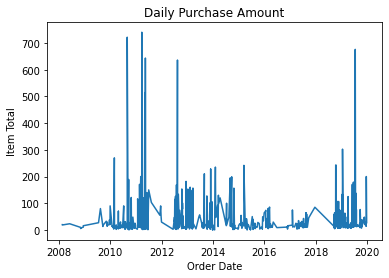

In [353]:
# Plot OrderDate and ItemTotal

fig, ax = plt.subplots()
ax.plot(df_main['OrderDate'], df_main['ItemTotal'])
ax.set_xlabel('Order Date')
ax.set_ylabel('Item Total')
ax.set_title('Daily Purchase Amount')
plt.show()

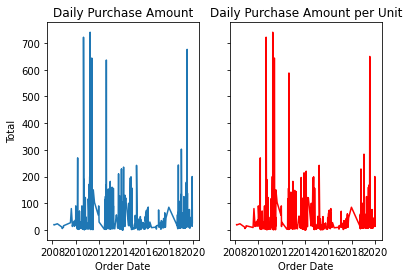

In [354]:
# Plot OrderDate and ItemTotal and OrderDate and PurchasePricePerUnit

fig, ax = plt.subplots(1,2, sharey = True)

ax[0].plot(df_main['OrderDate'], df_main['ItemTotal'])
ax[1].plot(df_main['OrderDate'], df_main['PurchasePricePerUnit'], color = 'r')

ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('Total')
ax[1].set_xlabel('Order Date')

ax[0].set_title('Daily Purchase Amount')
ax[1].set_title('Daily Purchase Amount per Unit')

plt.show()

In [355]:
# The previous graphs contained too much data since they were being plotted for each day. 
# Grouping will allow the information to be more legible.

# Purchases by Year 

df_OrderYear = df_main[['OrderDate', 'ItemTotal', 'OrderYear']]
df_OrderYear = df_OrderYear.sort_values('OrderDate')
df_OrderYear = df_OrderYear.groupby('OrderYear')
df_OrderYear = df_OrderYear['ItemTotal'].sum()
print(df_OrderYear)

OrderYear
2008     117.09
2009     456.85
2010    2421.77
2011    7176.93
2012    3651.85
2013    3689.19
2014    2075.99
2015    1257.52
2016     823.48
2017    1392.77
2018    2689.12
2019    4604.85
Name: ItemTotal, dtype: float64


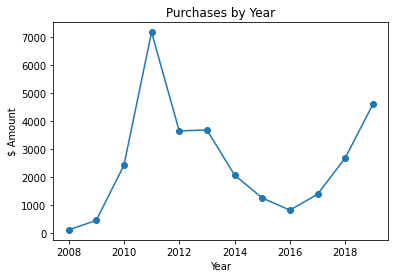

In [356]:
fig,ax = plt.subplots()
ax.plot(df_OrderYear.index, df_OrderYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.show()

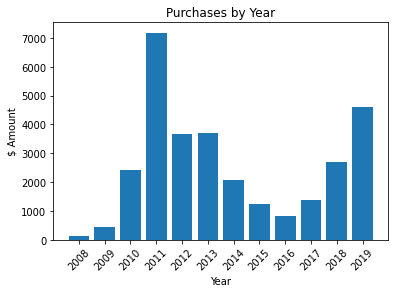

In [357]:
fig,ax = plt.subplots()
ax.bar(df_OrderYear.index, df_OrderYear.values)
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.xticks([x for x in df_OrderYear.index], rotation = 45)
plt.show()

In [358]:
# Purchases by Month

df_OrderMonth = df_main[['OrderDate', 'ItemTotal', 'OrderMonth']]
df_OrderMonth = df_OrderMonth.sort_values('OrderDate')
df_OrderMonth = df_OrderMonth.groupby('OrderMonth')
df_OrderMonth = df_OrderMonth['ItemTotal'].sum()
df_OrderMonth

OrderMonth
1     1435.93
2     3082.08
3     4439.17
4     1497.22
5     2198.31
6     2042.64
7     3352.54
8     3507.65
9     1887.06
10    2392.95
11    2187.99
12    2333.87
Name: ItemTotal, dtype: float64

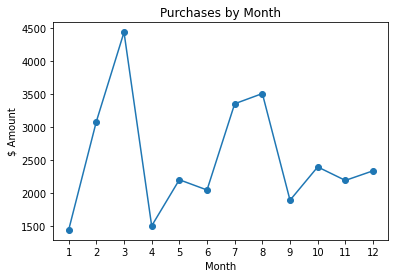

In [359]:
fig, ax = plt.subplots()
ax.plot(df_OrderMonth.index, df_OrderMonth.values, marker = 'o')
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()

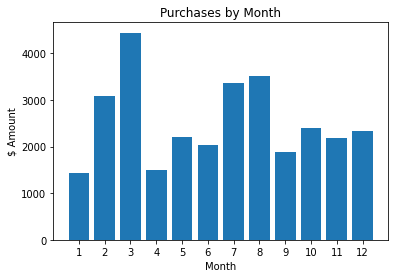

In [360]:
fig, ax = plt.subplots()
ax.bar(df_OrderMonth.index, df_OrderMonth.values)
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()

In [361]:
# Transactions by Year

df_TransYear = df_main[['OrderDate', 'ItemTotal', 'OrderYear']]
df_TransYear = df_TransYear.groupby('OrderYear')
df_TransYear = df_TransYear['ItemTotal'].size()
df_TransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
Name: ItemTotal, dtype: int64

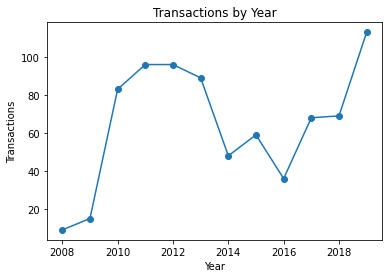

In [362]:
fig,ax = plt.subplots()
ax.plot(df_TransYear.index, df_TransYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Transactions')
ax.set_title('Transactions by Year')
plt.show()

In [363]:
# Transactions by Seller

df_TransSeller = df_main[['Seller']]
df_TransSeller = df_TransSeller.groupby(df_TransSeller['Seller'] == 'Amazon.com')
df_TransSeller = df_TransSeller.size()
df_TransSeller

Seller
False    329
True     452
dtype: int64

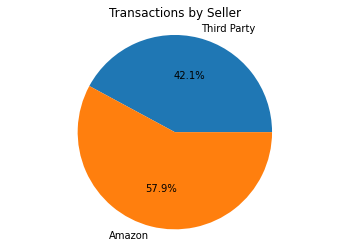

In [364]:
fig,ax = plt.subplots()
ax.pie(df_TransSeller.values, labels = ['Third Party', 'Amazon'], autopct = '%1.1f%%')
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

<ipython-input-365-2c5bfa80b192>:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


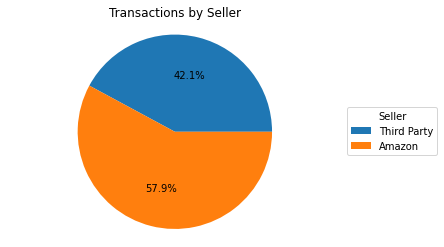

In [365]:
fig, ax = plt.subplots()
ax.pie(df_TransSeller.values, autopct = '%1.1f%%')
ax.legend(
    df_TransSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)
)
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

In [366]:
# Purchases by Seller

df_PurchasesSeller = df_main[['Seller', 'ItemTotal']]
df_PurchasesSeller = df_PurchasesSeller.groupby(df_PurchasesSeller['Seller'] == 'Amazon.com')
df_PurchasesSeller = df_PurchasesSeller['ItemTotal'].sum()
df_PurchasesSeller

Seller
False     7575.08
True     22782.33
Name: ItemTotal, dtype: float64

<ipython-input-367-00373a251a9c>:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


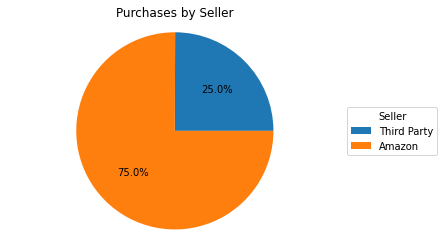

In [367]:
fig,ax = plt.subplots()
ax.pie(df_PurchasesSeller.values, autopct = '%1.1f%%')
ax.legend(
    df_PurchasesSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)    
)
ax.set_title('Purchases by Seller')
ax.axis('equal')
plt.show()

###  Connectin to SQL

In [ ]:
from dotenv import load_dotenv

In [370]:
dotenv_local_path = '//.env'
load_dotenv(dotenv_path=dotenv_local_path, verbose=True) 

True

In [371]:
%load_ext dotenv
%dotenv

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('mysql://' + os.environ.get("MYSQL_USER") + ":" + os.environ.get("MYSQL_PASSWORD") + '@localhost:3306/mysql')